## Dummy dataframe

For this project I need to create a dummy csv file that has a dataframe. It will consist of about 1000 rows and will contain relevant data and data with errors. This is because I need my parquet conversion program to clean the data before converting it to a parquet file 

In [2]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [658]:
# setting random seed to 42 for consistence with random generated numbers
np.random.seed(42) 

In [659]:
# creating a dataframe with 1000 rows
df = pd.DataFrame(index=range(1000))

# Adding a Unix datetime column with one second increments
start_time = int(time.mktime(time.strptime("2023-01-31 00:00:00", "%Y-%m-%d %H:%M:%S")))

df["Timestamp"] = pd.to_numeric(range(start_time, start_time + 1000))

df["Timestamp"] = df["Timestamp"].astype(int)

# added this data to reference the datetime for future columns. 
#df["Date_time"] = pd.to_datetime(df["Timestamp"], unit="s")

df.head()


,Timestamp
0,1675119600
1,1675119601
2,1675119602
3,1675119603
4,1675119604


In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Timestamp  1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [661]:
def generate_dict_numbers(high, low, decimal):

    result_dict = {}

    for i in range(1,11):
        if i % 2 == 0:
                result_dict[str(i)] = np.round(np.random.uniform(low=high/2, high=high),decimals=decimal)
        else:
             result_dict[str(i)] = np.round(np.random.uniform(low=low, high=high/2),decimals=decimal)

    return result_dict

In [662]:
speed_over_ground_dict = generate_dict_numbers(19,0,2)
print(speed_over_ground_dict)

{'1': 3.56, '2': 18.53, '3': 6.95, '4': 15.19, '5': 1.48, '6': 10.98, '7': 0.55, '8': 17.73, '9': 5.71, '10': 16.23}


In [663]:

def add_interpolate_points_and_cols(column,dict):
    df[column] = np.nan
    df.at[0, column] = dict["1"]
    df.at[199, column] = dict["2"]
    df.at[200,column] = dict["3"]
    df.at[399,column] = dict["4"]
    df.at[400, column] = dict["5"]
    df.at[599, column] = dict["6"]
    df.at[600,column] = dict["7"]
    df.at[799,column] = dict["8"]
    df.at[800,column] = dict["9"]
    df.at[999,column] = dict["10"]

### Speed column

In [664]:
add_interpolate_points_and_cols("speed_over_ground", speed_over_ground_dict)


In [665]:
df.loc[:200]

,Timestamp,speed_over_ground
0,1675119600,3.56
1,1675119601,NaN
2,1675119602,NaN
3,1675119603,NaN
4,1675119604,NaN
...,...,...
196,1675119796,NaN
197,1675119797,NaN
198,1675119798,NaN
199,1675119799,18.53


In [666]:
random_fluctuations = np.random.uniform(low=-0.5, high=0.5,size=len(df))

df.speed_over_ground = (df.speed_over_ground.interpolate(method="linear") + random_fluctuations).round(2)
df.loc[0:200]

,Timestamp,speed_over_ground
0,1675119600,3.08
1,1675119601,4.11
2,1675119602,4.04
3,1675119603,3.50
4,1675119604,3.54
...,...,...
196,1675119796,17.91
197,1675119797,18.54
198,1675119798,17.96
199,1675119799,18.19


Text(0.5, 1.0, 'speed_over_ground')

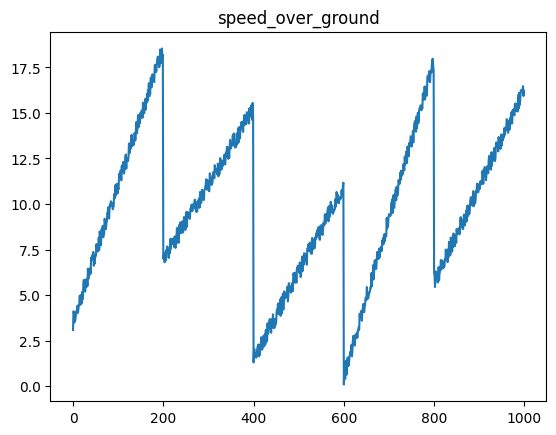

In [667]:
plt.plot(df["speed_over_ground"])
plt.title("speed_over_ground")

### Longitude column

In [668]:
longitude_dict = generate_dict_numbers(179,-179, 6) 
print(longitude_dict)

{'1': -119.605265, '2': 177.896287, '3': 74.479933, '4': 93.0287, '5': 10.446934, '6': 172.309724, '7': -130.51552, '8': 140.331098, '9': 66.808608, '10': 92.538165}


In [669]:
add_interpolate_points_and_cols("Longitude", longitude_dict)
df.loc[:200]

,Timestamp,speed_over_ground,Longitude
0,1675119600,3.08,-119.605265
1,1675119601,4.11,NaN
2,1675119602,4.04,NaN
3,1675119603,3.50,NaN
4,1675119604,3.54,NaN
...,...,...,...
196,1675119796,17.91,NaN
197,1675119797,18.54,NaN
198,1675119798,17.96,NaN
199,1675119799,18.19,177.896287


In [670]:
#random_fluctuations = np.random.uniform(low=-0.5, high=0.5,size=len(df))

fluctuations = np.random.uniform(low=-0.000005, high=0.000005,size=len(df))
df.Longitude = (df.Longitude.interpolate(method="linear").rolling(window=40, min_periods=1).mean() + fluctuations).round(6)
df.loc[:200]

,Timestamp,speed_over_ground,Longitude
0,1675119600,3.08,-119.605263
1,1675119601,4.11,-118.857776
2,1675119602,4.04,-118.110278
3,1675119603,3.50,-117.362786
4,1675119604,3.54,-116.615295
...,...,...,...
196,1675119796,17.91,144.259173
197,1675119797,18.54,145.754161
198,1675119798,17.96,147.249144
199,1675119799,18.19,148.744123


Text(0.5, 1.0, 'Longitude')

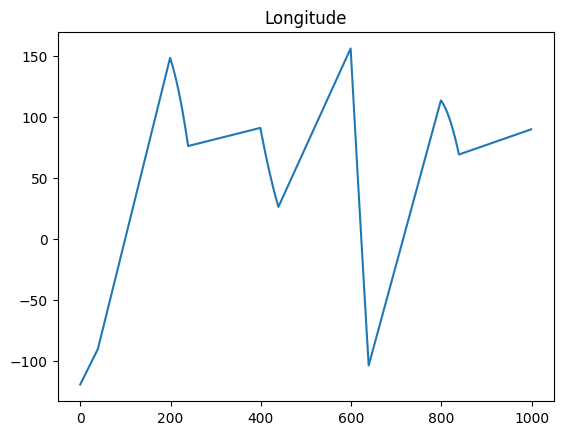

In [671]:
plt.plot(df["Longitude"])
plt.title("Longitude")

### Latitude

In [672]:
latitude_dict = generate_dict_numbers(79,-79, 6)
print(latitude_dict)

{'1': 35.16224, '2': 61.626643, '3': 32.013462, '4': 41.564186, '5': -29.372992, '6': 49.776233, '7': 7.602284, '8': 78.261235, '9': -48.601188, '10': 65.339897}


In [673]:
add_interpolate_points_and_cols("Latitude", latitude_dict)
df.head()

,Timestamp,speed_over_ground,Longitude,Latitude
0,1675119600,3.08,-119.605263,35.16224
1,1675119601,4.11,-118.857776,NaN
2,1675119602,4.04,-118.110278,NaN
3,1675119603,3.50,-117.362786,NaN
4,1675119604,3.54,-116.615295,NaN


In [674]:
fluctuations = np.random.uniform(low=-0.000005, high=0.000005,size=len(df))
df.Latitude = (df.Latitude.interpolate(method="linear").rolling(window=40, min_periods=1).mean() + fluctuations).round(6)
df.loc[:200]

,Timestamp,speed_over_ground,Longitude,Latitude
0,1675119600,3.08,-119.605263,35.162237
1,1675119601,4.11,-118.857776,35.228734
2,1675119602,4.04,-118.110278,35.295227
3,1675119603,3.50,-117.362786,35.361725
4,1675119604,3.54,-116.615295,35.428215
...,...,...,...,...
196,1675119796,17.91,144.259173,58.634435
197,1675119797,18.54,145.754161,58.767425
198,1675119798,17.96,147.249144,58.900409
199,1675119799,18.19,148.744123,59.033395


Text(0.5, 1.0, 'Latitude')

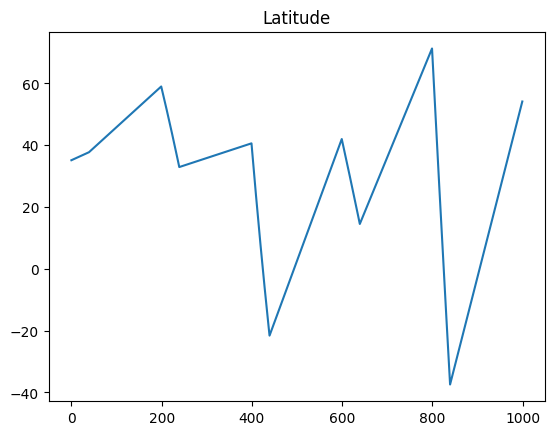

In [675]:
plt.plot(df["Latitude"])
plt.title("Latitude")

### Engine fuel rate

In [676]:
''' This column is based on the speed_over_ground
 I have multiplied by 5. If the max value the speed can be 20 and the max fuel rate is 100 a multiple of 5 works perfectly'''

df["engine_fuel_rate"] = np.clip(df["speed_over_ground"]* 5, 0, 100)+ random_fluctuations

df["engine_fuel_rate"] = df["engine_fuel_rate"].round(2)



In [677]:
df.head()

,Timestamp,speed_over_ground,Longitude,Latitude,engine_fuel_rate
0,1675119600,3.08,-119.605263,35.162237,14.92
1,1675119601,4.11,-118.857776,35.228734,21.02
2,1675119602,4.04,-118.110278,35.295227,20.53
3,1675119603,3.50,-117.362786,35.361725,17.21
4,1675119604,3.54,-116.615295,35.428215,17.38


Text(0.5, 1.0, 'Fuel rate')

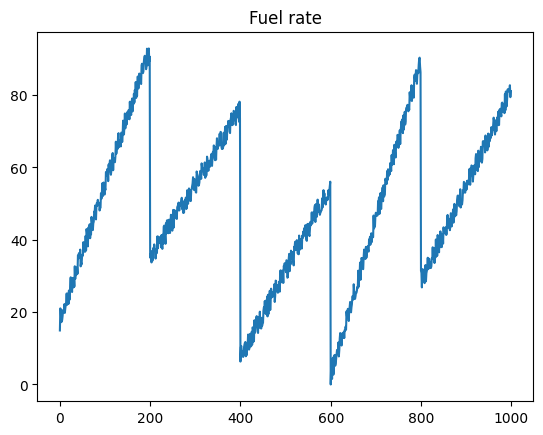

In [678]:
plt.plot(df["engine_fuel_rate"])
plt.title("Fuel rate")

In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   int64  
 1   speed_over_ground  1000 non-null   float64
 2   Longitude          1000 non-null   float64
 3   Latitude           1000 non-null   float64
 4   engine_fuel_rate   1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


The next stage after creating this data frame is to add some bad data. This can be done in a few ways. I should have values that are not applicable in certain ranges within the selected column. Also I will add nan values within in each colum so my next program can handle them. Below are some examples on what I will apply on each column.

- Time stamp:   
    - remove one or more number so there is less then 10 digits
    - add nan value
    - add 0 value
    - add string value

- speed_over_ground 
    - add string value
    - add minus value
    - add positive number over 20
    - add nan value


- Longitude and Latitude 
    - add minus values beyond the range of - 90 and -180
    - add positive values over 90 and 180
    - add string value
    - add nan value
  

- engine_fuel_rate 
    - add string value
    - add minus values 
    - add value over range of 100
    - add nan value


In [680]:
def random_replace(df, column_name, condition, lower=None, upper=None, text=None, replace=None, round=None):
    """ Replace random cells in a DataFrame based on specified conditions.
    
    Parameters: 
    - df: pandas Dataframe
    - column_name: str, the column the replacement will occur¨
    - condition: str, which condition ("nan", "number", "text")
    - lower: numeric, lowest number for replacement(required for "low" and "high" condition)
    - upper: numeric, highest number for replacement (required for "low" and "high" condition)
    - word: numeric or string, the value to use for replacement (required for "text" condition)
    - replace: int, number of random replacements to perform
    - round: int, number of decimal places for the condition  (required for "lower" and "upper")

    Returns:
    - df: Pandas DataFrame with replaced values

    """

    random_rows = np.random.choice(df.index, size= replace, replace=False )

    if condition == "nan":
        df.loc[random_rows, column_name] = np.nan
    elif condition == "number":
        high_values = np.random.uniform(lower, upper, len(random_rows)).round(round)
        df.loc[random_rows, column_name] = high_values
    elif condition == "text":
        df.loc[random_rows,column_name] = text
    else:
        print("Invalid condition. Use 'nan', 'number', or 'text'")

    return df



In [681]:
test_df = pd.DataFrame(
    {"1": [1675119600, 1675119601,1675119602,1675119603,1675119604],
     "2" : [1.56,2.45,3.78,4.56,10],
     "3": [-119.605263, 110.605263,-109.605263,119.605263,-119.608263],
     "4" : [35.162237,-35.162237,35.162237,-40.162237,35.166237],
     "5" : [14.92,55.92,67.92,14.92,99.92]
     }
)

In [682]:
test_df.head()

,1,2,3,4,5
0,1675119600,1.56,-119.605263,35.162237,14.92
1,1675119601,2.45,110.605263,-35.162237,55.92
2,1675119602,3.78,-109.605263,35.162237,67.92
3,1675119603,4.56,119.605263,-40.162237,14.92
4,1675119604,10.00,-119.608263,35.166237,99.92


In [683]:
test_df = random_replace(test_df,"5", "number", lower=0, upper=-13, replace=2,round=2)

In [684]:
test_df

,1,2,3,4,5
0,1675119600,1.56,-119.605263,35.162237,-3.61
1,1675119601,2.45,110.605263,-35.162237,55.92
2,1675119602,3.78,-109.605263,35.162237,67.92
3,1675119603,4.56,119.605263,-40.162237,14.92
4,1675119604,10.00,-119.608263,35.166237,-1.32


In [685]:
test_df = random_replace(test_df,"4","text",text="bye",replace=2)
test_df = random_replace(test_df,"3","nan", replace = 4)


/tmp/ipykernel_1161/1631826296.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'bye' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[random_rows,column_name] = text


In [686]:
test_df.head()

,1,2,3,4,5
0,1675119600,1.56,-119.605263,bye,-3.61
1,1675119601,2.45,NaN,-35.162237,55.92
2,1675119602,3.78,NaN,35.162237,67.92
3,1675119603,4.56,NaN,bye,14.92
4,1675119604,10.00,NaN,35.166237,-1.32


# Applying bad data

### Timestamp column

In [687]:
''' The function is working well so now I will apply it to the real dataset.
I will fix the float values first as when adding strings does not allow for a numerical search for the changes I have made.
Also adding nans makes it harder to search to see if my numerical changes were successful '''

# Timestamp column
bad_df = random_replace(df,"Timestamp","number", lower=0, upper=999999999, replace=5,round=0) # creating a smaller number


In [688]:
bad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   int64  
 1   speed_over_ground  1000 non-null   float64
 2   Longitude          1000 non-null   float64
 3   Latitude           1000 non-null   float64
 4   engine_fuel_rate   1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [689]:
# Adding numbers less than the actual timestamp length
bad_df.loc[(bad_df["Timestamp"] < 1000000000)]

,Timestamp,speed_over_ground,Longitude,Latitude,engine_fuel_rate
179,717120568,16.77,118.844468,56.373663,83.59
409,249458204,2.16,72.284658,23.755409,11.05
487,462391176,5.21,65.350142,-2.525893,25.63
590,856132498,10.22,149.128373,38.440794,50.77
955,864962604,13.76,84.327984,28.981817,68.66


In [690]:
bad_df = random_replace(bad_df,"Timestamp", "text",text="ERROR", replace= 5) # adding strings into numerical type column
bad_df = random_replace(bad_df,"Timestamp", "nan", replace=10) # adding nan values

/tmp/ipykernel_1161/1631826296.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ERROR' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[random_rows,column_name] = text


In [691]:
# You can see now that the Timestamp has Dtype of object. due to the fact that I have added nan and string values
print(f"Number of Cells with 'ERROR': {(bad_df['Timestamp'] == 'ERROR').sum()}")
print("\n")
bad_df.info()

Number of Cells with 'ERROR': 5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          990 non-null    object 
 1   speed_over_ground  1000 non-null   float64
 2   Longitude          1000 non-null   float64
 3   Latitude           1000 non-null   float64
 4   engine_fuel_rate   1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


### speed over ground

In [692]:
# adding numbers over the max
bad_df = random_replace(bad_df,"speed_over_ground","number", lower=20, upper=100, replace=5,round=2)
# adding numbers in minus values
bad_df = random_replace(bad_df,"speed_over_ground","number", lower=-1, upper=-100, replace=5, round=2)

In [693]:
bad_df.loc[(bad_df["speed_over_ground"] < 0) | (bad_df["speed_over_ground"] > 20)]


,Timestamp,speed_over_ground,Longitude,Latitude,engine_fuel_rate
33,1675119633,83.61,-94.938048,37.356524,32.66
96,1675119696,-84.27,-5.239095,45.335743,53.36
130,1675119730,98.20,45.590322,49.857299,69.46
244,1675119844,30.86,76.763570,33.189309,41.87
358,NaN,97.15,87.389501,38.660576,65.65
364,1675119964,-61.16,87.948763,38.948539,66.12
400,1675120000,60.23,89.237441,38.901676,6.32
518,1675120118,-98.36,90.564945,9.803885,32.91
760,1675120360,-4.56,60.710354,57.489636,69.46
813,1675120413,-66.18,103.833937,32.277040,31.40


In [694]:
bad_df = random_replace(bad_df,"speed_over_ground", "text",text="ERROR", replace= 5) # adding strings into numerical type column
bad_df = random_replace(bad_df,"speed_over_ground", "nan", replace=10) # adding nan values

/tmp/ipykernel_1161/1631826296.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ERROR' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[random_rows,column_name] = text


In [695]:
print(f"Number of Cells with 'ERROR': {(bad_df['speed_over_ground'] == 'ERROR').sum()}")
print("\n")
bad_df.info()

Number of Cells with 'ERROR': 4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          990 non-null    object 
 1   speed_over_ground  990 non-null    object 
 2   Longitude          1000 non-null   float64
 3   Latitude           1000 non-null   float64
 4   engine_fuel_rate   1000 non-null   float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


### Longitude and Latitude

In [696]:
# adding numbers over the max Longitude
bad_df = random_replace(bad_df,"Longitude","number", lower=180, upper=500, replace=5,round=6)
# adding numbers in minus values Longitude
bad_df = random_replace(bad_df,"Longitude","number", lower=-180, upper=-500, replace=5, round=6)

# adding numbers over the max Latitude
bad_df = random_replace(bad_df,"Latitude","number", lower=90, upper=250, replace=5,round=6)
# adding numbers in minus values Latitude
bad_df = random_replace(bad_df,"Latitude","number", lower=-90, upper=-250, replace=5, round=6)

In [697]:
#Longitude
bad_df.loc[(bad_df["Longitude"] < -180) | (bad_df["Longitude"] > 180)]


,Timestamp,speed_over_ground,Longitude,Latitude,engine_fuel_rate
91,1675119691,10.54,-309.315151,44.670807,52.84
138,1675119738,13.49,-343.847485,50.921195,67.00
269,1675119869,10.1,435.213593,34.389143,50.80
323,1675119923,11.66,-442.493747,36.980802,57.92
363,1675119963,13.88,279.098227,38.900538,69.58
548,1675120148,8.8,226.410475,21.735928,44.26
682,1675120282,7.64,-355.629362,29.794164,38.21
691,1675120291,7.96,-250.880336,32.989799,39.35
794,1675120394,17.22,352.134248,69.562016,86.02
848,1675120448,NaN,428.312592,-32.282991,41.61


In [698]:
#Latitude
bad_df.loc[(bad_df["Latitude"] < -90) | (bad_df["Latitude"] > 90)]

,Timestamp,speed_over_ground,Longitude,Latitude,engine_fuel_rate
10,1675119610,4.42,-112.130356,-111.279774,22.21
159,NaN,15.61,88.944818,-93.578646,78.14
168,1675119768,16.63,102.399660,159.674484,83.59
322,1675119922,11.52,84.033950,234.977453,57.11
623,1675120223,2.57,-2.434400,223.603774,12.88
645,1675120245,4.06,-95.809040,-132.188073,19.93
843,1675120443,8.38,69.847023,203.307187,42.30
905,1675120505,11.2,77.863263,-111.336321,55.94
965,1675120565,14.19,85.620918,113.586045,70.71
978,1675120578,14.87,87.301743,-97.969260,74.10


In [699]:
bad_df = random_replace(bad_df,"Longitude", "text",text="ERROR", replace= 5) # adding strings into numerical type column
bad_df = random_replace(bad_df,"Longitude", "nan", replace=10) # adding nan values

bad_df = random_replace(bad_df,"Latitude", "text",text="ERROR", replace= 5) # adding strings into numerical type column
bad_df = random_replace(bad_df,"Latitude", "nan", replace=10) # adding nan values

/tmp/ipykernel_1161/1631826296.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ERROR' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[random_rows,column_name] = text
/tmp/ipykernel_1161/1631826296.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ERROR' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[random_rows,column_name] = text


In [700]:
print(f"Number of Cells with 'ERROR' in Longitude: {(bad_df['Longitude'] == 'ERROR').sum()}")
print("\n")

print(f"Number of Cells with 'ERROR' in Latitude: {(bad_df['Latitude'] == 'ERROR').sum()}")
print("\n")

bad_df.info()

Number of Cells with 'ERROR' in Longitude: 5


Number of Cells with 'ERROR' in Latitude: 5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          990 non-null    object 
 1   speed_over_ground  990 non-null    object 
 2   Longitude          990 non-null    object 
 3   Latitude           990 non-null    object 
 4   engine_fuel_rate   1000 non-null   float64
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


### Engine fuel rate

In [701]:
# adding numbers over the max
bad_df = random_replace(bad_df,"engine_fuel_rate","number", lower=100, upper=1000, replace=5,round=2)
# adding numbers in minus values
bad_df = random_replace(bad_df,"engine_fuel_rate","number", lower=-1, upper=-100, replace=5, round=2)

In [702]:
bad_df.loc[(bad_df["engine_fuel_rate"] < -1) | (bad_df["engine_fuel_rate"] > 100)]

,Timestamp,speed_over_ground,Longitude,Latitude,engine_fuel_rate
94,1675119694,11.04,-8.229055,45.069773,-81.23
163,1675119763,15.55,94.924753,54.245868,332.18
211,1675119811,7.47,132.897588,51.565147,-70.46
230,1675119830,8.63,97.486696,39.114668,-42.36
354,1675119954,13.77,87.01666,38.468598,206.41
536,1675120136,7.59,105.205805,16.963109,-43.34
783,1675120383,16.46,92.014237,65.656243,-44.03
790,1675120390,17.16,101.541509,68.141741,237.41
805,1675120405,5.99,110.262648,54.466731,432.97
958,1675120558,14.13,84.715866,30.699519,236.33


In [703]:
bad_df = random_replace(bad_df,"engine_fuel_rate", "text",text="ERROR", replace= 5) # adding strings into numerical type column
bad_df = random_replace(bad_df,"engine_fuel_rate", "nan", replace=10) # adding nan values

/tmp/ipykernel_1161/1631826296.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ERROR' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[random_rows,column_name] = text


In [704]:
print(f"Number of Cells with 'ERROR': {(bad_df['engine_fuel_rate'] == 'ERROR').sum()}")
print("\n")

bad_df.info()

Number of Cells with 'ERROR': 5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Timestamp          990 non-null    object
 1   speed_over_ground  990 non-null    object
 2   Longitude          990 non-null    object
 3   Latitude           990 non-null    object
 4   engine_fuel_rate   990 non-null    object
dtypes: object(5)
memory usage: 39.2+ KB


Now that I have added all the bad data within the Dataframe I can save it to a csv file so I continue with the next part of the project.

In [705]:
bad_df.to_csv("../src/Data/dummy_boat_data.csv", index=False)

In [4]:
final_df = pd.read_csv("../src/Data/dummy_boat_data.csv")

In [6]:
final_df.head()

,Timestamp,speed_over_ground,Longitude,Latitude,engine_fuel_rate
0,1675119600,3.08,-119.605263,35.162237,14.92
1,1675119601,4.11,-118.857776,35.228734,21.02
2,1675119602,4.04,-118.110278,35.295227,20.53
3,1675119603,3.5,-117.362786,35.361725,17.21
4,1675119604,ERROR,-116.615295,35.428215,17.38
